In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv('Death-rates-from-air-pollution.csv')

In [3]:
data

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922
...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173


In [160]:
data.head(5)

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


# Finding Max Year And Min Year

In [153]:
print('Min Year :',data['Year'].min(),'<==> Max Year : ',data['Year'].max())

Min Year : 1990 <==> Max Year :  2017


# Shape of the Dataset

In [58]:
shape = data.shape
print('Shape of the Dataset is :',shape)

Shape of the Dataset is : (6468, 7)


# Information About our dataset

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           6468 non-null   object 
 1   Code                                             5488 non-null   object 
 2   Year                                             6468 non-null   int64  
 3   Air pollution (total) (deaths per 100,000)       6468 non-null   float64
 4   Indoor air pollution (deaths per 100,000)        6468 non-null   float64
 5   Outdoor particulate matter (deaths per 100,000)  6468 non-null   float64
 6   Outdoor ozone pollution (deaths per 100,000)     6468 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 353.8+ KB


# Data Cleaning

# Removing Unwanted Columns

In [16]:
print('Counting Null values for each colomns \n',data.isnull().sum())

Counting Null values for each colomns 
 Entity                                               0
Code                                               980
Year                                                 0
Air pollution (total) (deaths per 100,000)           0
Indoor air pollution (deaths per 100,000)            0
Outdoor particulate matter (deaths per 100,000)      0
Outdoor ozone pollution (deaths per 100,000)         0
dtype: int64


In [62]:
Null_data = data[data['Code'].isna()]['Entity'].unique()

In [63]:
Null_data

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'East Asia',
       'Eastern Europe', 'Eastern Sub-Saharan Africa', 'England',
       'High SDI', 'High-income', 'High-income Asia Pacific',
       'High-middle SDI', 'Latin America and Caribbean', 'Low SDI',
       'Low-middle SDI', 'Middle SDI', 'North Africa and Middle East',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South Asia', 'Southeast Asia',
       'Southeast Asia, East Asia, and Oceania', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa'], dtype=object)

In [19]:
region = ['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia', 'Central Europe', 
          'Central Europe, Eastern Europe, and Central Asia', 'Central Latin America', 
          'Central Sub-Saharan Africa', 'East Asia', 'Eastern Europe', 'Eastern Sub-Saharan Africa',
          'Latin America and Caribbean', 'North Africa and Middle East', 'North America', 
          'Oceania', 'Scotland', 'South Asia', 'Southeast Asia', 'Southeast Asia, East Asia, and Oceania',
          'Southern Latin America', 'Southern Sub-Saharan Africa','Sub-Saharan Africa', 
          'Tropical Latin America', 'Western Europe', 'Western Sub-Saharan Africa']
constituent_country = ['England', 'Northern Ireland', 'Wales']
income = ['High-income', 'High-income Asia Pacific']
sdis = ['High SDI', 'High-middle SDI', 'Middle SDI', 'Low-middle SDI', 'Low SDI']

In [20]:
regions = data[data['Entity'].isin(region)].copy(deep=True)
regions.drop('Code', axis=1, inplace=True)
constituent_countries = data[data['Entity'].isin(constituent_country)].copy(deep=True)
constituent_countries.drop('Code', axis=1, inplace=True)
high_income = data[data['Entity'].isin(income)].copy(deep=True)
high_income.drop('Code', axis=1, inplace=True)
sdi = data[data['Entity'].isin(sdis)].copy(deep=True)
sdi.drop('Code', axis=1, inplace=True)

In [252]:
countries = data.copy(deep=True)
countries.dropna(inplace=True)

In [172]:
countries.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [21]:
print('Total Number of Missing Values:', \
      sum(countries.isna().sum().values) + \
      sum(regions.isna().sum().values) + \
      sum(constituent_countries.isna().sum().values) + \
      sum(high_income.isna().sum().values) + \
      sum(sdi.isna().sum().values)
     )

Total Number of Missing Values: 0


# Scatter Plot

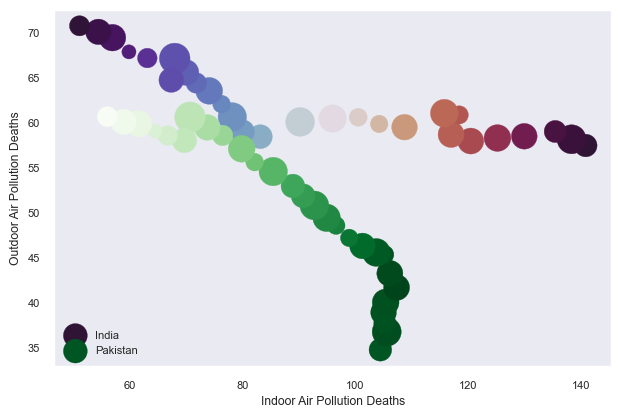

In [67]:
india = data[data['Entity'] == 'India']
pakistan = data[data['Entity'] == 'Pakistan']
plt.style.use('seaborn-paper')
random_sizes = np.random.randint(100, 500, size = len(india))
plt.scatter(india['Indoor air pollution (deaths per 100,000)'], india['Outdoor particulate matter (deaths per 100,000)'],
            alpha = 1.0, c = india['Indoor air pollution (deaths per 100,000)'], s = random_sizes, cmap = 'twilight_shifted', label = 'India')

plt.scatter(pakistan['Indoor air pollution (deaths per 100,000)'], pakistan['Outdoor particulate matter (deaths per 100,000)'],
            alpha = 1.0, c = pakistan['Indoor air pollution (deaths per 100,000)'], s = random_sizes, cmap = 'Greens', label = 'Pakistan')

plt.xlabel('Indoor Air Pollution Deaths')
plt.ylabel('Outdoor Air Pollution Deaths')
plt.legend(loc = 3)
plt.show()

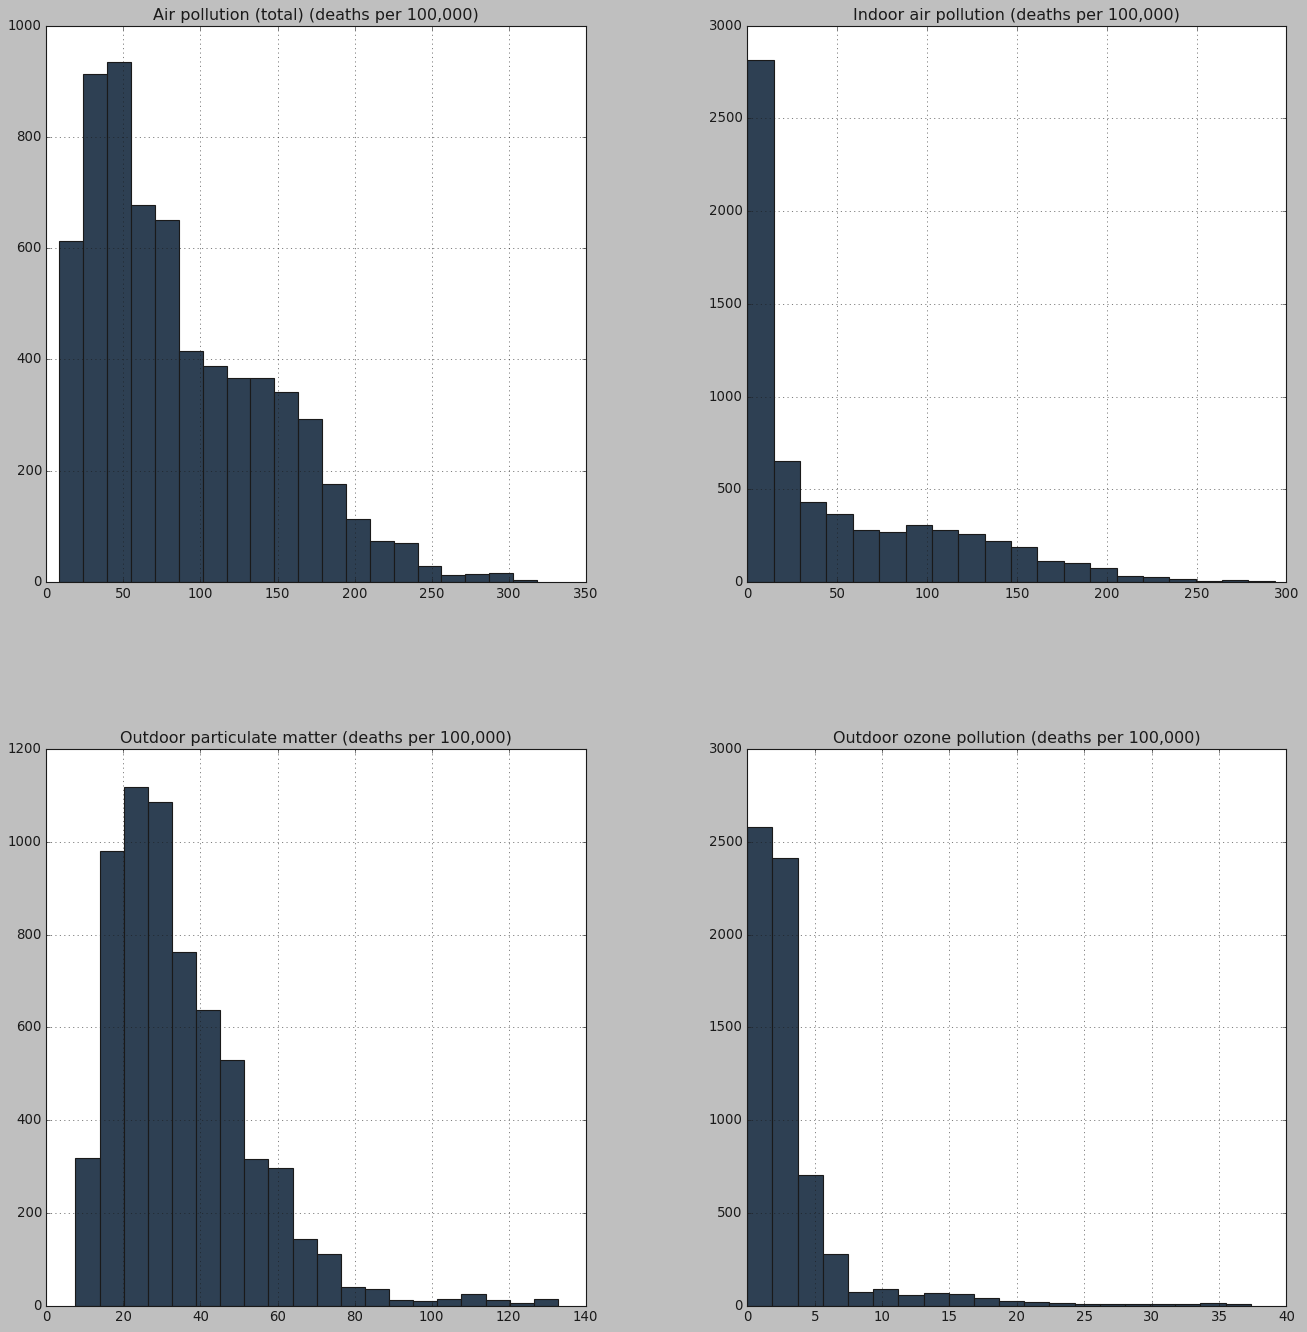

In [141]:
plt.style.use('classic')
data.drop('Year', axis = 1).hist(bins = 20, figsize = (20, 20), color = '#2E4053')
plt.show()

# pie chart

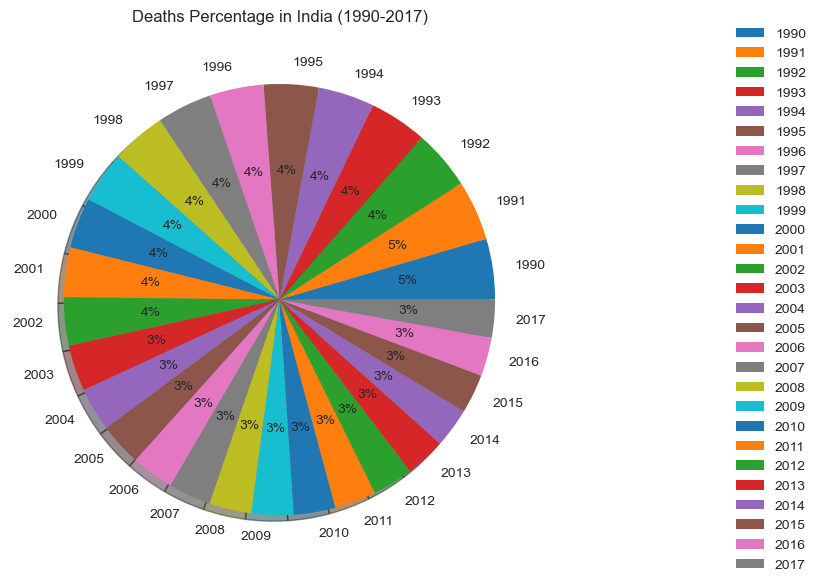

In [7]:
plt.figure(figsize = (10,7))
plt.style.use('seaborn-dark')

ind = data[(data['Air pollution (total) (deaths per 100,000)'] >= 100 ) & (data['Entity'] == 'India')]
ind_air_deaths = ind['Air pollution (total) (deaths per 100,000)']

plt.pie(ind_air_deaths, labels = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,2008, 2009, 2010, 2011, 2012,2013, 2014, 2015, 2016,2017],
        autopct='%1.0f%%',shadow = True)
plt.title('Deaths Percentage in India (1990-2017)')
plt.legend( loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

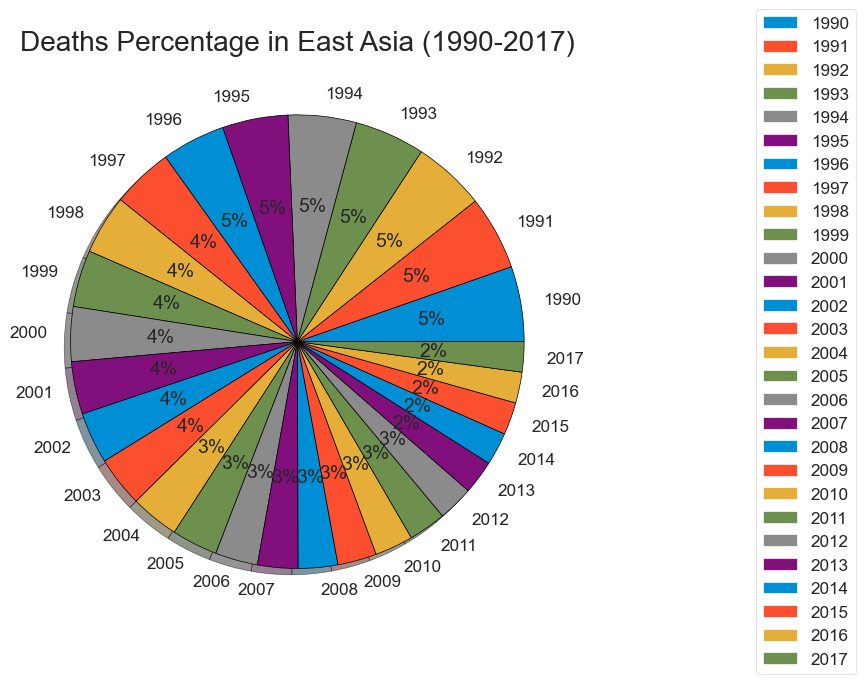

In [12]:
plt.figure(figsize = (10,7))
sns.set_style('whitegrid')
East = data[(data['Air pollution (total) (deaths per 100,000)'] >= 50 ) & (data['Entity'] == 'East Asia')]
East_Asia_air_deaths = East['Air pollution (total) (deaths per 100,000)']
plt.pie(East_Asia_air_deaths, labels = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,2008, 2009, 2010, 2011, 2012,2013, 2014, 2015, 2016,2017],
        autopct='%1.0f%%',shadow = True)
plt.title('Deaths Percentage in East Asia (1990-2017)')
plt.legend( loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
wedges = plt.gca().patches
for wedge in wedges:
    wedge.set_edgecolor('black')
    wedge.set_linewidth(0.5)
plt.show()

# rus['Year'].to_list()

# Joint Plot

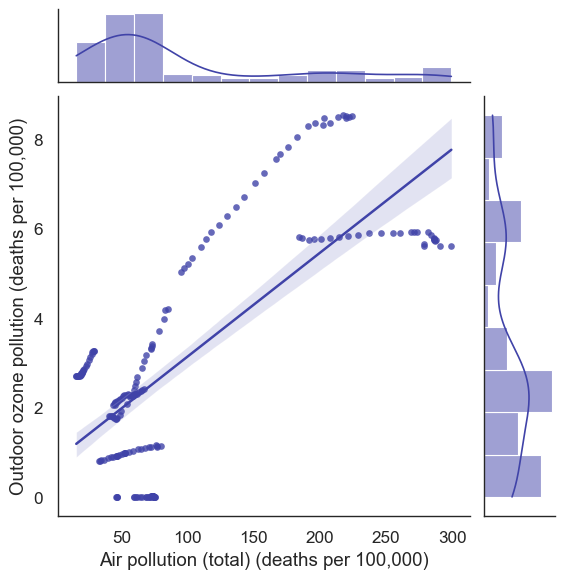

In [98]:
sns.jointplot(x = 'Air pollution (total) (deaths per 100,000)', y = 'Outdoor ozone pollution (deaths per 100,000)',
        data = data.head(200), color = '#4043A8', kind='reg')
sns.set_style('white')
sns.set_context('paper', font_scale=1.4)

sns.despine(left=False, bottom=False)
plt.show()

# Pair Plot

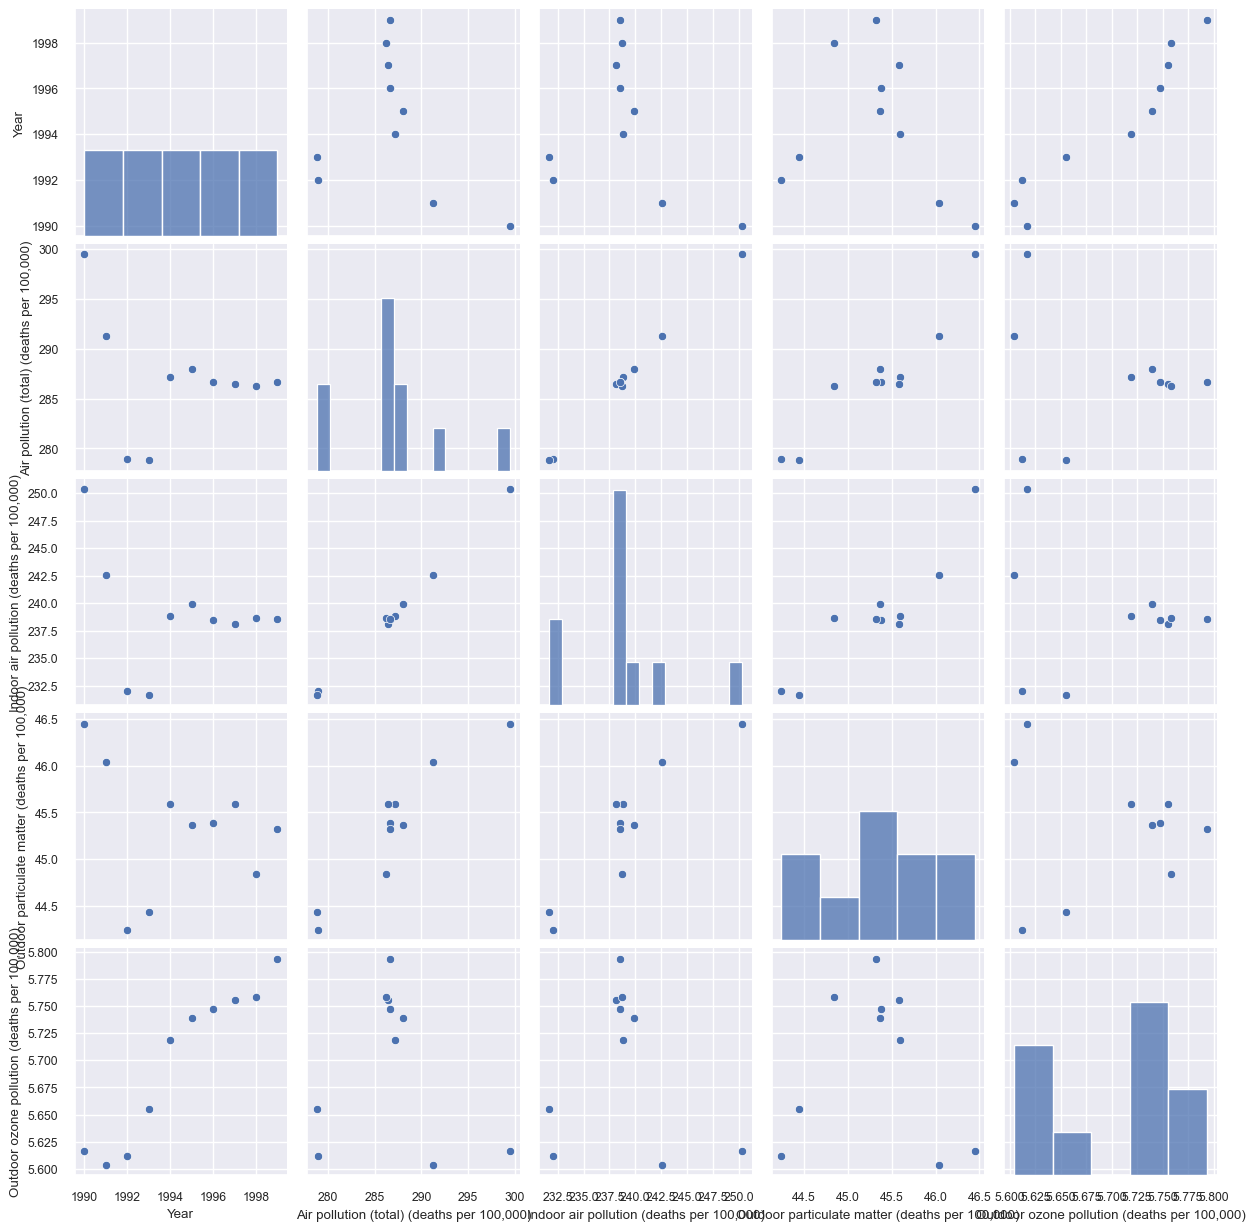

In [136]:
sns.pairplot(data.head(10))
sns.set(font_scale=0.2)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


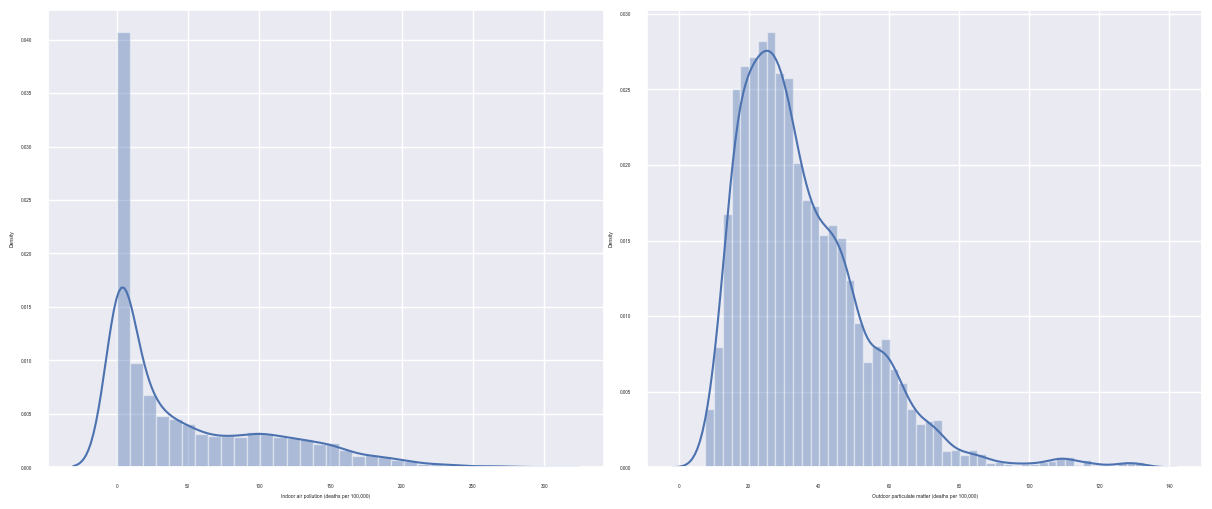

In [139]:
plt.figure(figsize = (30,5))
for i,j in enumerate(data.iloc[:,4:-1].columns):
    plt.subplot(1,5,i+1)
    sns.distplot(data[j])
    sns.set(font_scale=0.3)
    plt.tight_layout()
plt.subplots_adjust()
plt.show()

In [8]:
pivot_table = data.pivot_table(index='Entity', columns='Year')
pivot_table["Mean"] = pivot_table.mean(axis=1)
pivot_table.head()

Air pollution (total) (deaths per 100,000)              \
Year                                                       1990        1991   
Entity                                                                        
Afghanistan                                          299.477309  291.277967   
Albania                                               82.828947   85.185665   
Algeria                                               66.759231   65.588370   
American Samoa                                        74.023565   73.951554   
Andean Latin America                                  79.763045   76.381988   

                                                                      \
Year                        1992        1993        1994        1995   
Entity                                                                 
Afghanistan           278.963056  278.790815  287.162923  288.014224   
Albania                82.296959   78.381630   73.232751   72.001364   
Algeria                64.416213   63.322732   61.652310   60.416410   
American Samoa         73.891553   73.188215   72.901698   72.440268   
Andean Latin America   77.068876   75.673929   72.435150   70.499181   

                                                                      ...  \
Year                        1996        1997        1998        1999  ...   
Entity                                                                ...   
Afghanistan           286.642589  286.447455  286.265202  286.636018  ...   
Albania                72.990115   71.823235   68.420030   66.567192  ...   
Algeria                60.013099   59.341128   58.248926   57.803370  ...   
American Samoa         72.493595   73.370531   73.971062   74.789455  ...   
Andean Latin America   67.325984   64.488892   62.307276   58.297415  ...   

                     Outdoor particulate matter (deaths per 100,000)  \
Year                                                            2009   
Entity                                                                 
Afghanistan                                                46.833372   
Albania                                                    22.041708   
Algeria                                                    45.480168   
American Samoa                                             42.499721   
Andean Latin America                                       27.561263   

                                                                             \
Year                       2010       2011       2012       2013       2014   
Entity                                                                        
Afghanistan           46.733269  48.290188  48.148226  46.376090  45.193898   
Albania               21.979911  23.190445  21.799216  21.574317  21.170528   
Algeria               44.409046  44.153391  43.264311  43.069062  42.912413   
American Samoa        42.378526  43.155297  41.325092  40.618380  39.170491   
Andean Latin America  27.541425  26.985868  26.184889  25.084556  23.238377   

                                                             Mean  
Year                       2015       2016       2017              
Entity                                                             
Afghanistan           47.334537  44.826196  45.737662  127.146767  
Albania               21.786089  20.810664  20.837393   29.839263  
Algeria               42.547814  42.803037  41.976233   26.984774  
American Samoa        39.226430  38.283279  38.620556   35.228429  
Andean Latin America  22.009573  21.652371  21.471817   27.115926  

[5 rows x 113 columns]

<AxesSubplot:title={'center':'Top 10 most polluting countries on average (1990-2017)'}, xlabel='Entity', ylabel='Levels of pollution'>

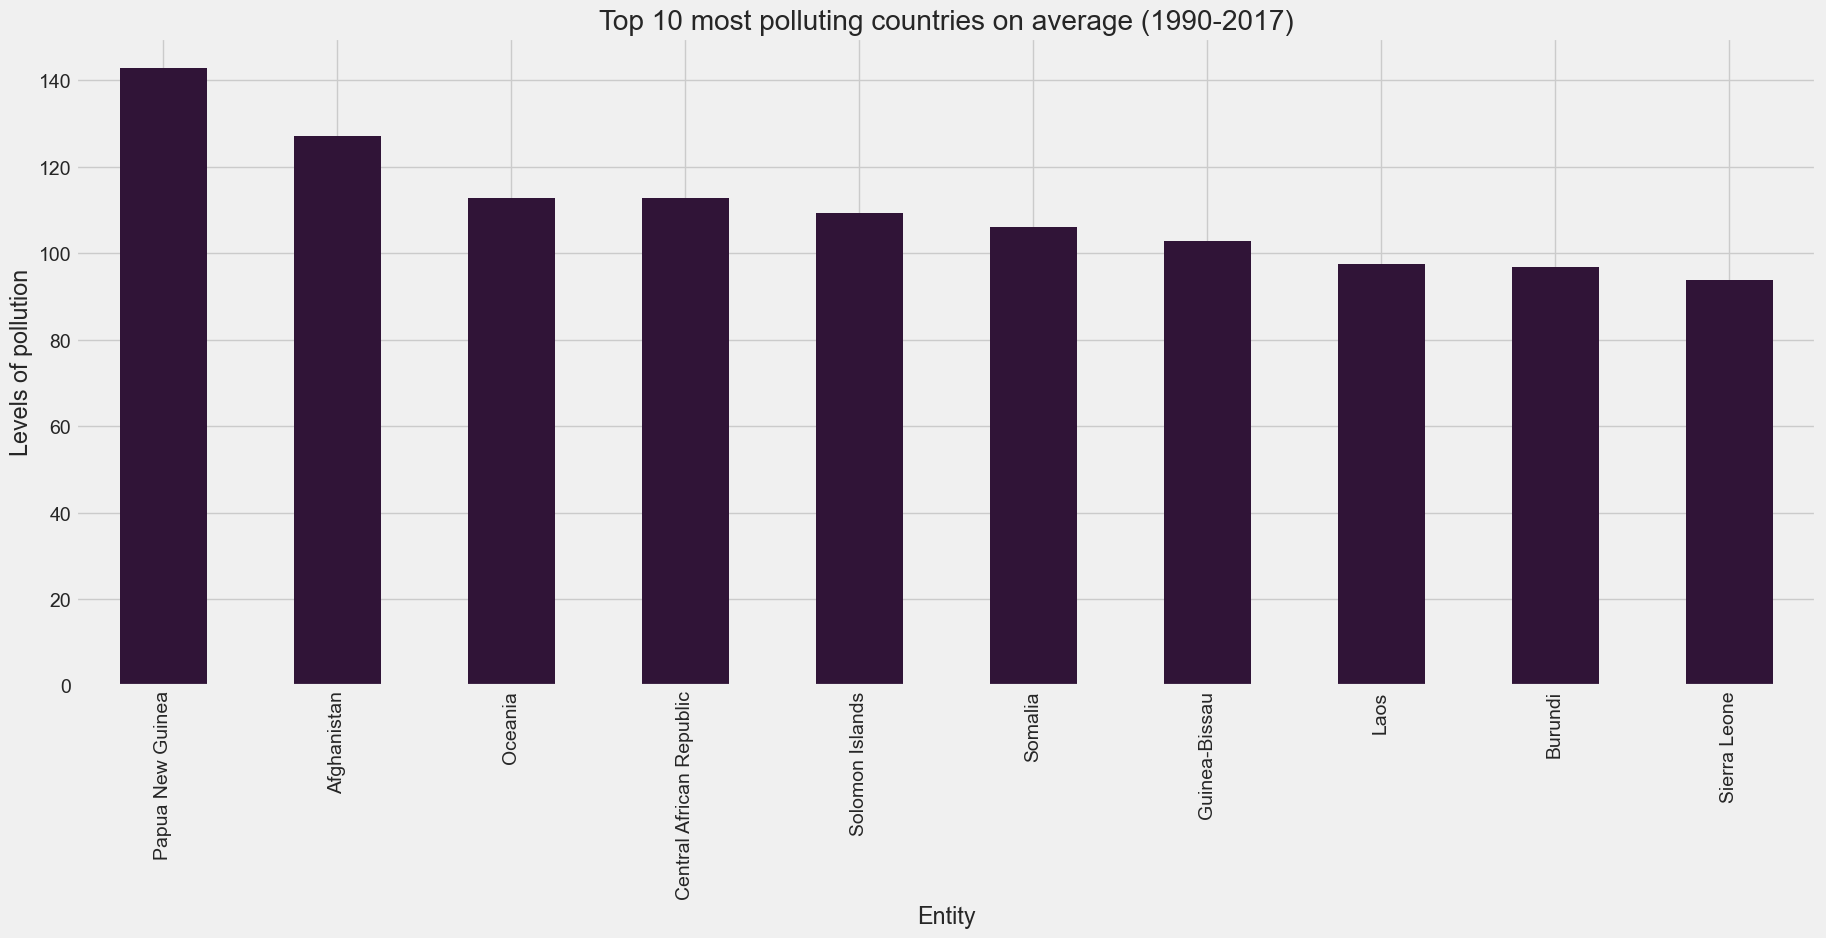

In [9]:
plt.style.use('fivethirtyeight')
Top_countries = pivot_table.sort_values('Mean',ascending = False)['Mean'].head(10)
Top_countries.plot.bar(figsize = (20,8), title = 'Top 10 most polluting countries on average (1990-2017)', ylabel = "Levels of pollution", cmap = 'twilight_shifted')

<AxesSubplot:title={'center':'Top 10 least polluting countries on average (1990-2017)'}, xlabel='Entity', ylabel='Levels of pollution'>

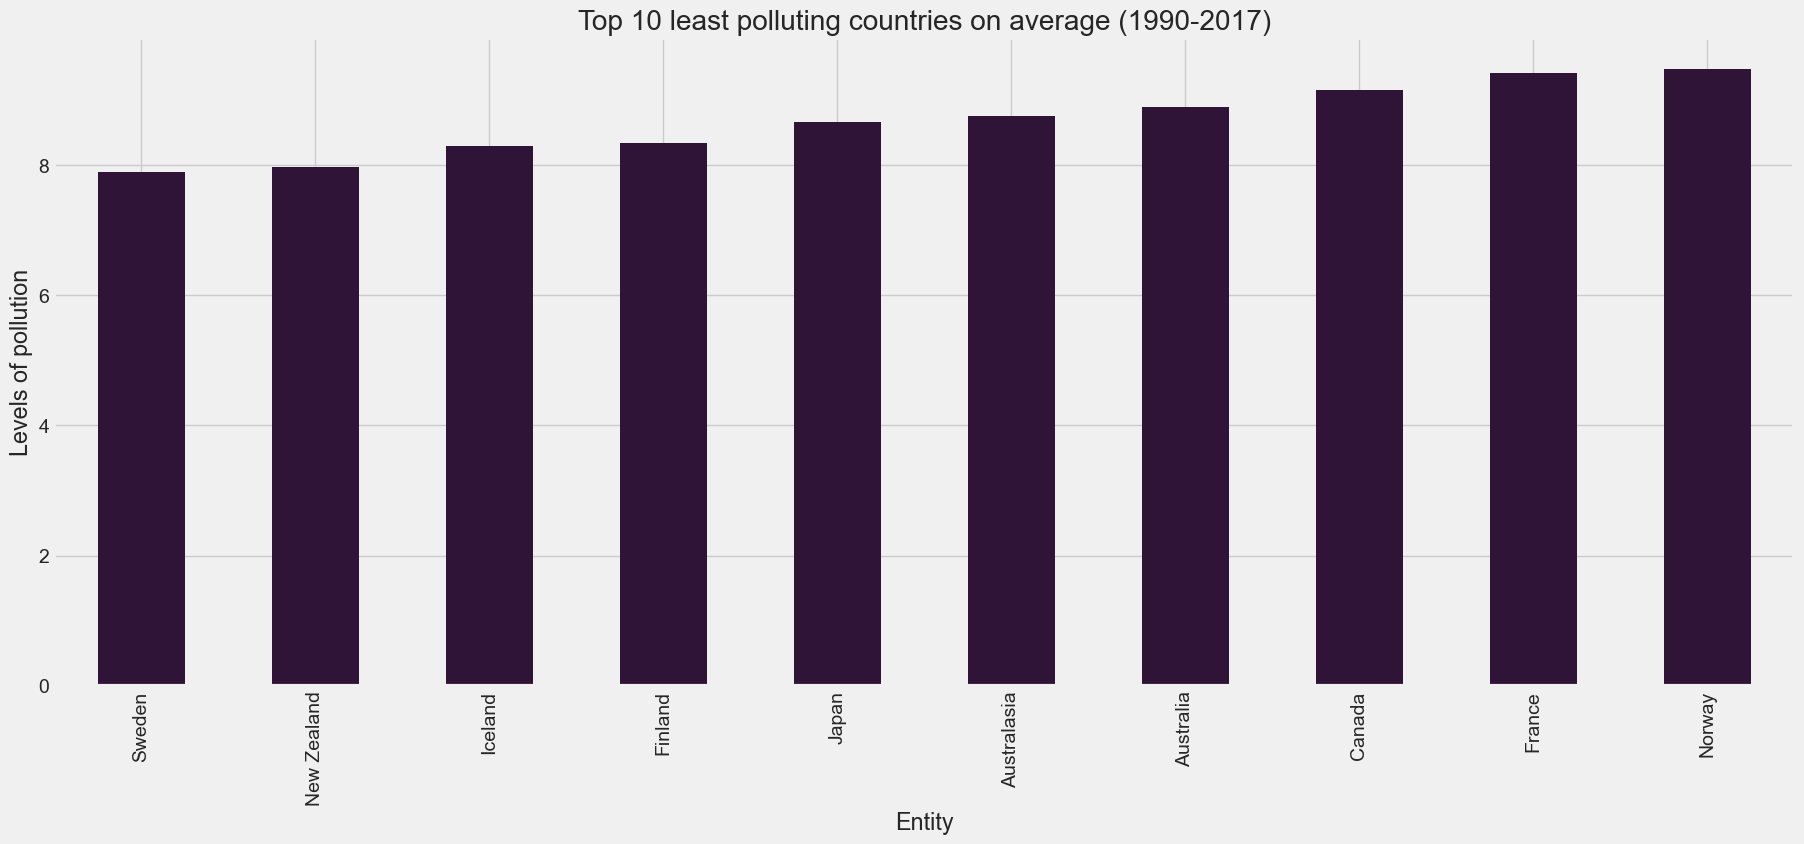

In [10]:
plt.style.use('fivethirtyeight')
least_countries = pivot_table.sort_values('Mean',ascending = True)['Mean'].head(10)
least_countries.plot.bar(figsize = (20,8), title = 'Top 10 least polluting countries on average (1990-2017)', ylabel = "Levels of pollution", cmap = 'twilight_shifted')
plt.show()

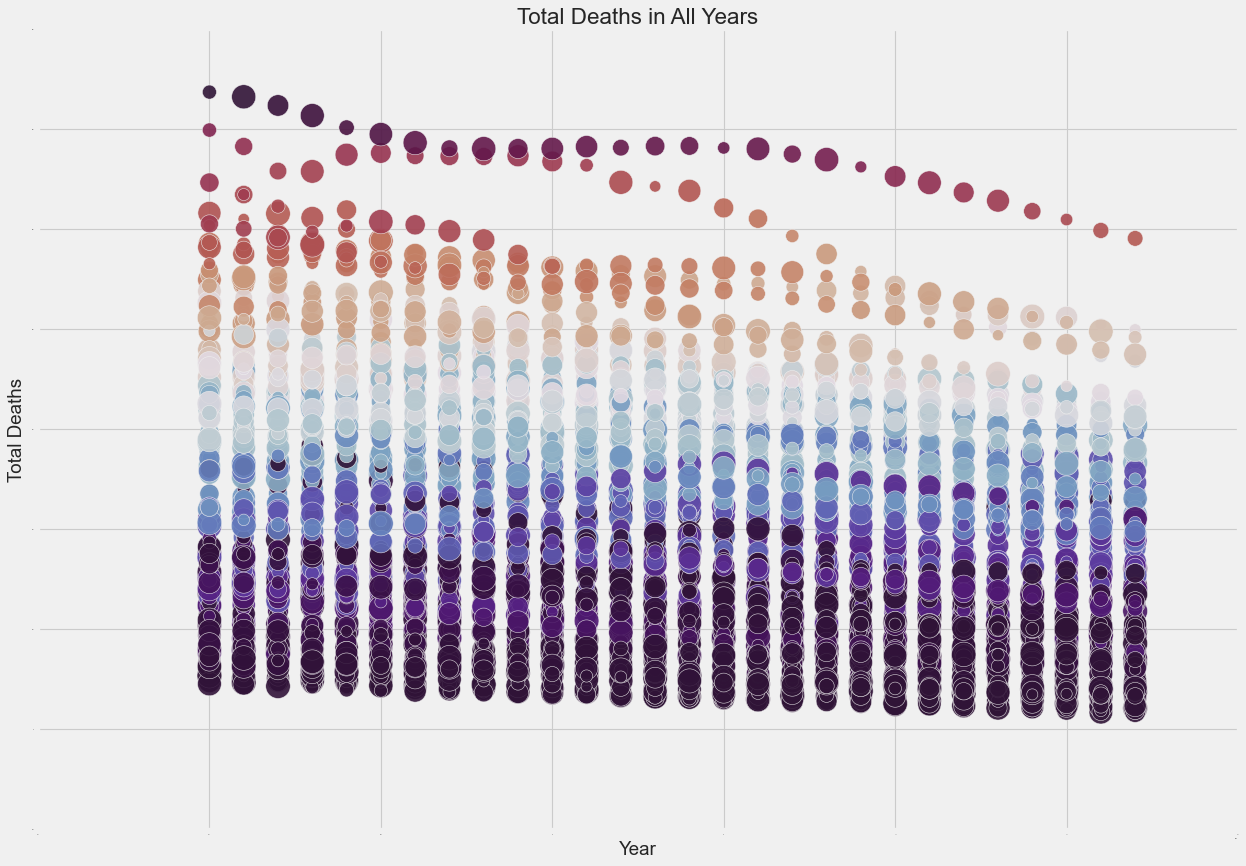

In [145]:
year = data['Year']
pollution = data['Air pollution (total) (deaths per 100,000)']
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15,10))
axes = fig.add_axes([0, 0, 1, 1])
random_sizes = np.random.randint(100, 500, size=len(data))
axes.set_xlabel('Year')
axes.set_ylabel('Total Deaths')
axes.set_title('Total Deaths in All Years')
axes.scatter(year, pollution, alpha=0.9,c = data['Indoor air pollution (deaths per 100,000)'], s = random_sizes, cmap = 'twilight_shifted')
plt.show()

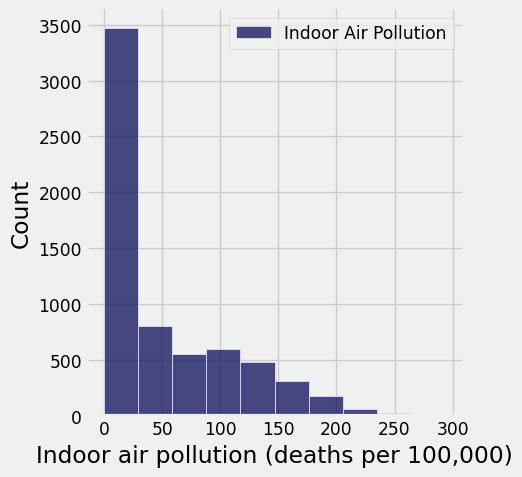

In [8]:
sns.displot(data['Indoor air pollution (deaths per 100,000)'], kde=False, bins=10, color = '#0D0F5B', label = 'Indoor Air Pollution')
plt.style.use('fivethirtyeight')
plt.legend()
plt.show()

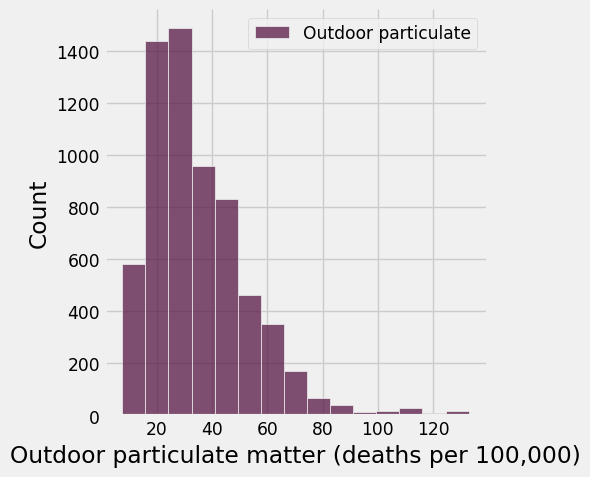

In [10]:
sns.displot(data['Outdoor particulate matter (deaths per 100,000)'], kde=False, bins=15, color = '#581845', label = 'Outdoor particulate')
plt.style.use('fivethirtyeight')
plt.legend()
plt.show()

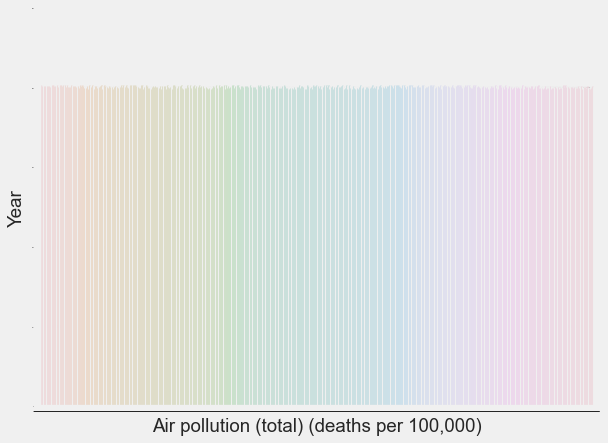

In [146]:
sns.barplot(x = 'Air pollution (total) (deaths per 100,000)', y = 'Year', data = data, estimator=np.median)
plt.show()

In [ ]:
data.drop('Mean', axis = 1,  inplace = True)

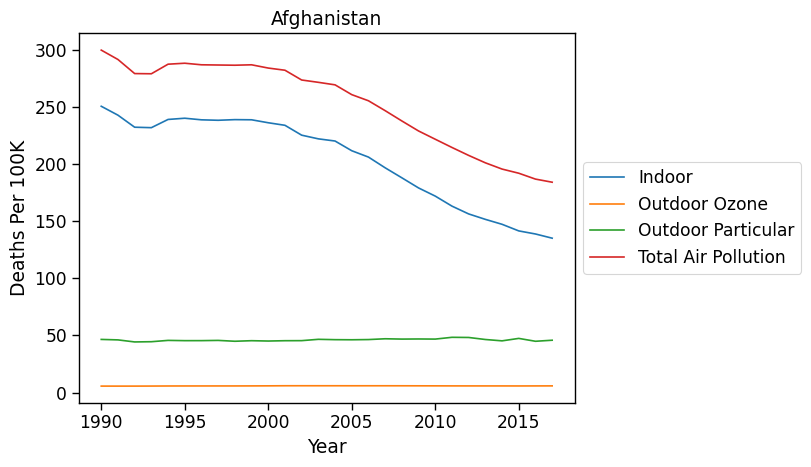

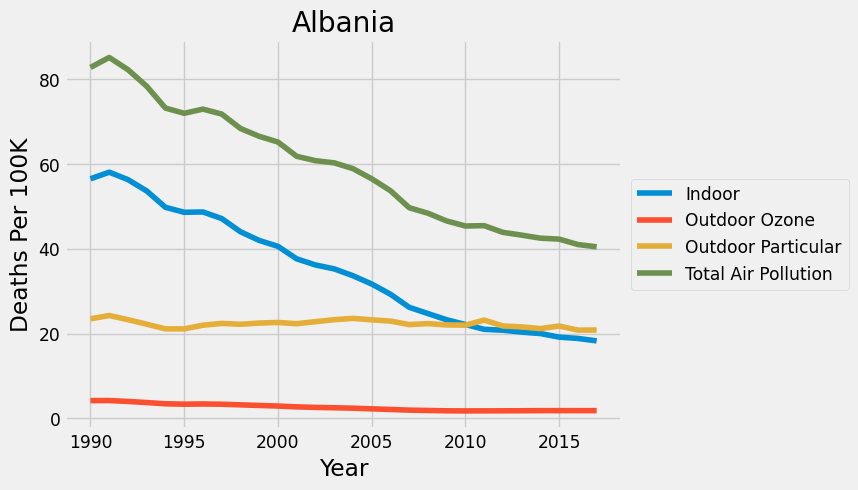

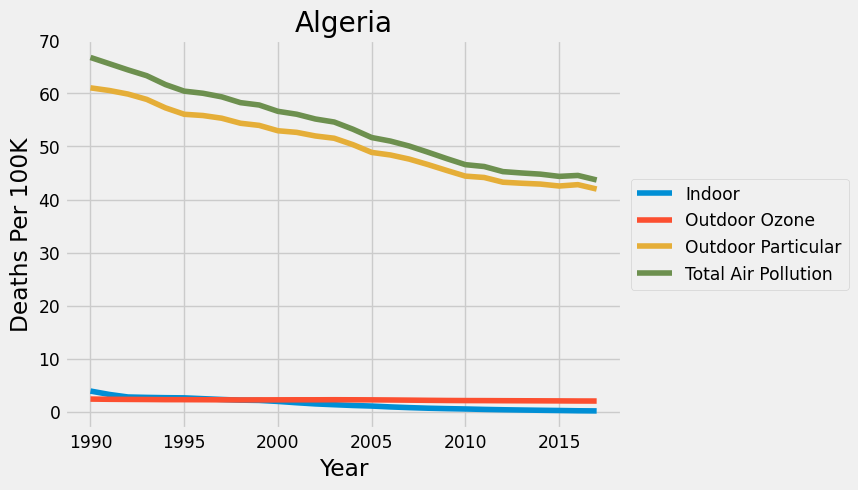

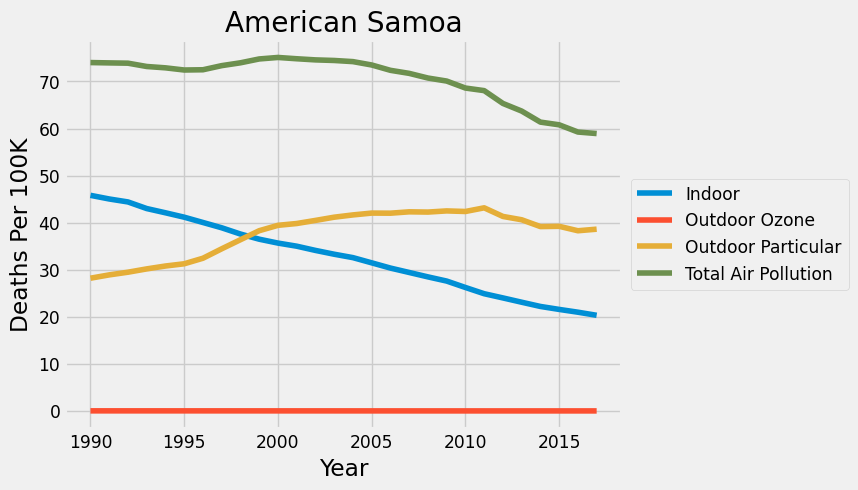

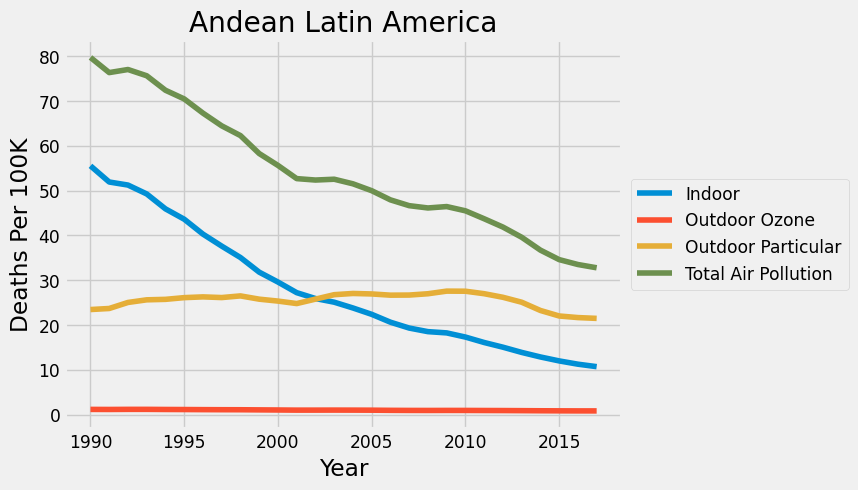

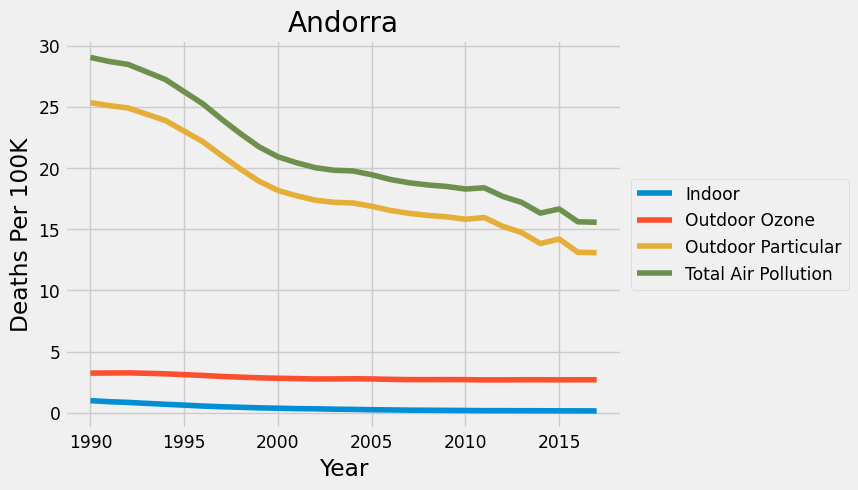

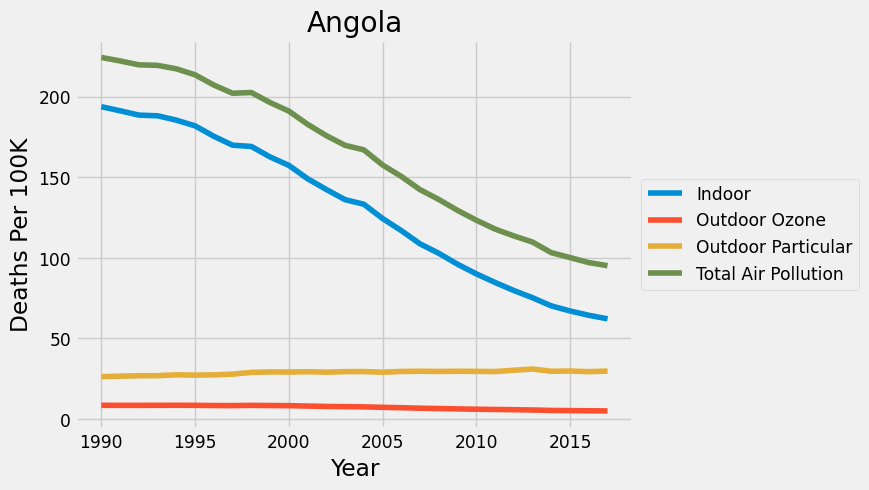

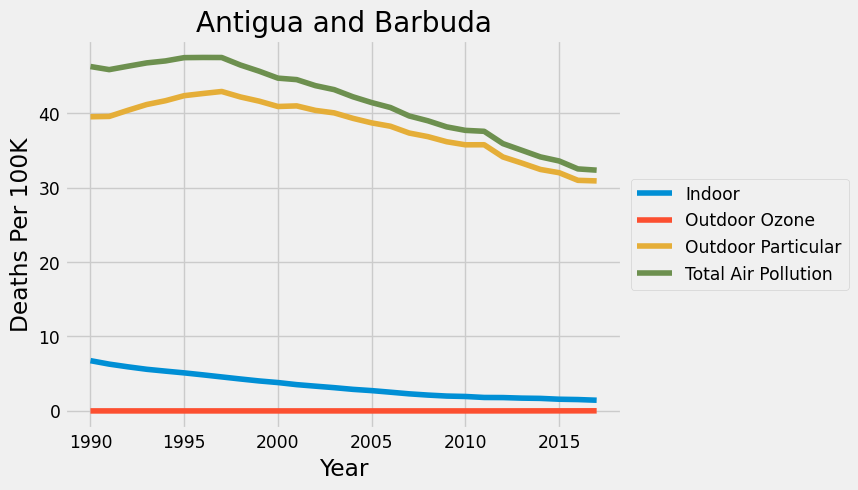

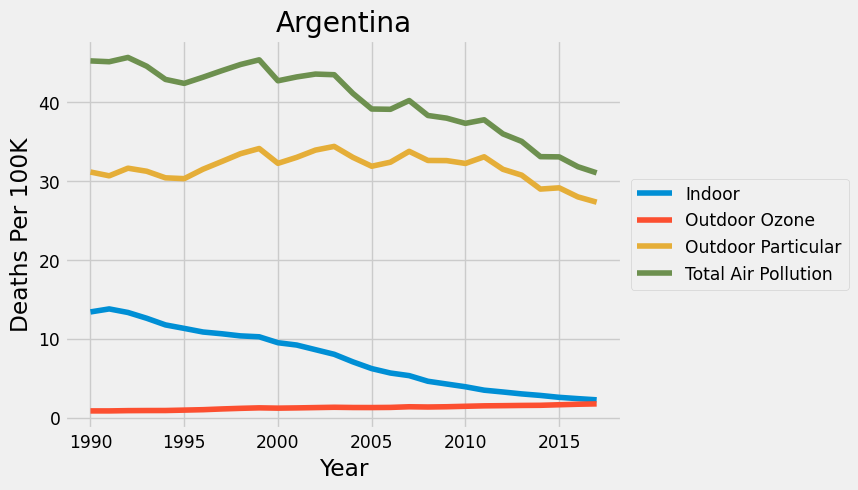

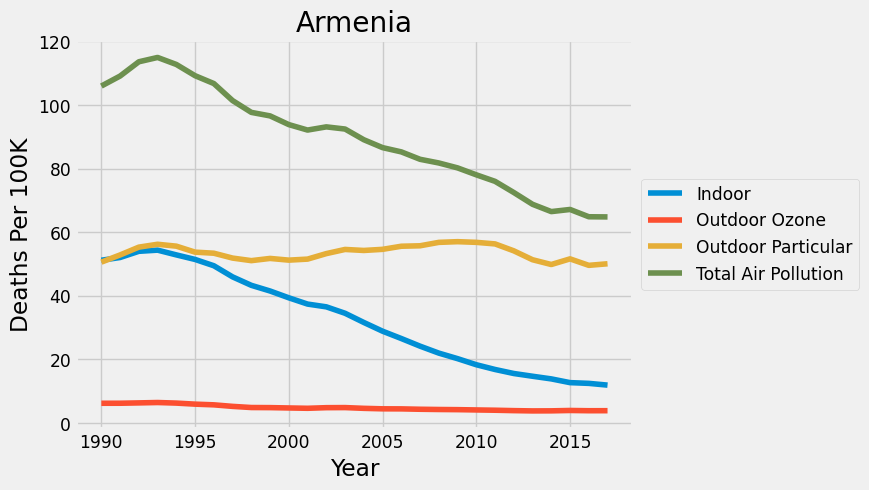

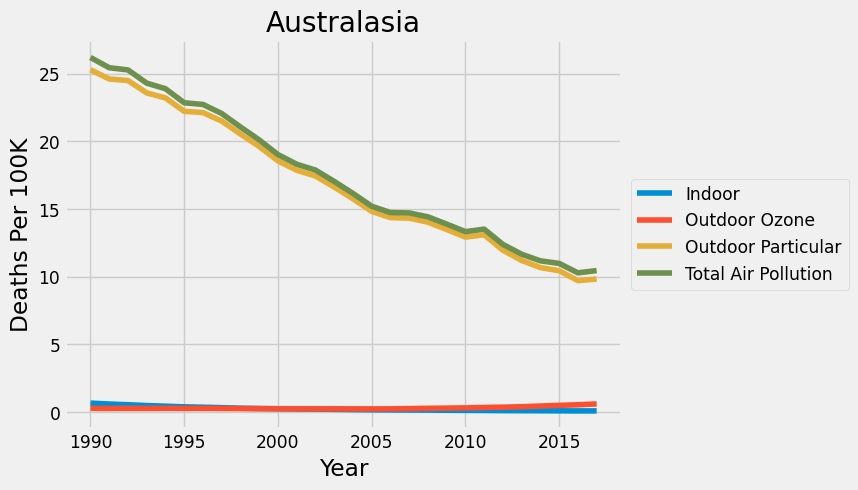

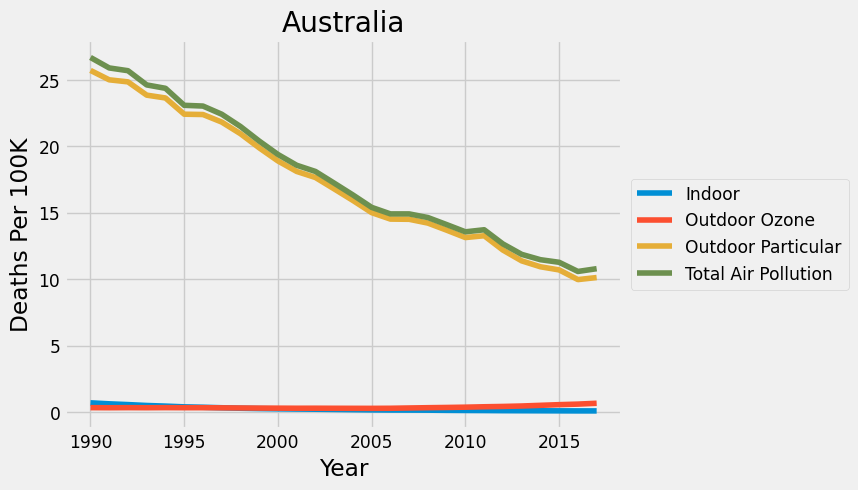

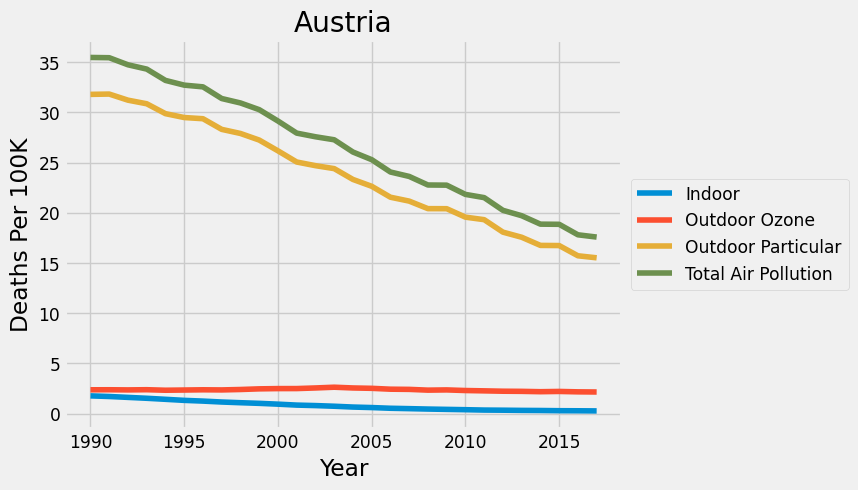

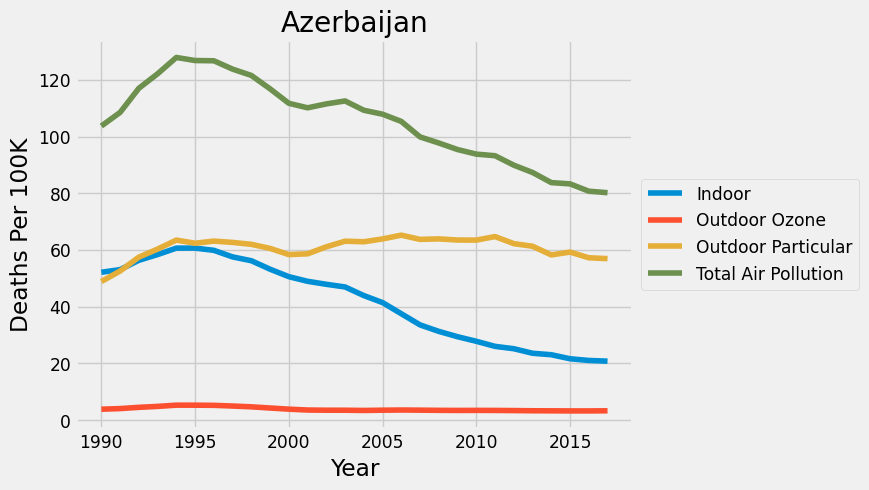

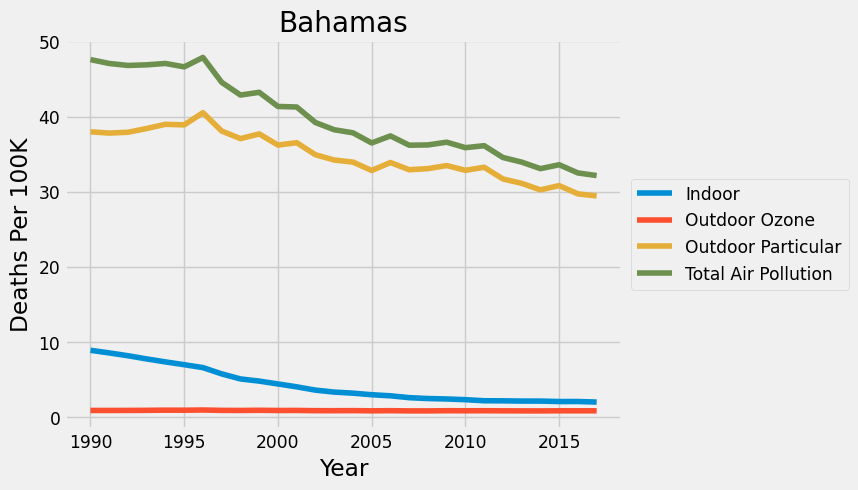

In [7]:
countries = data["Entity"].unique().tolist()
def creategraph(countryname):
    Diff_countres = data[data["Entity"]==countryname]
    plt.plot(Diff_countres["Year"],Diff_countres["Indoor air pollution (deaths per 100,000)"],label="Indoor")
    plt.plot(Diff_countres["Year"],Diff_countres["Outdoor ozone pollution (deaths per 100,000)"],label="Outdoor Ozone")
    plt.plot(Diff_countres["Year"],Diff_countres["Outdoor particulate matter (deaths per 100,000)"],label="Outdoor Particular")
    plt.plot(Diff_countres["Year"],Diff_countres["Air pollution (total) (deaths per 100,000)"],label="Total Air Pollution")
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.title(countryname)
    plt.xlabel("Year")
    plt.ylabel("Deaths Per 100K")
    plt.show()
# creategraph("India")
for i in range(15):
    creategraph(countries[i])
    plt.style.use('fivethirtyeight')

# Heat Map

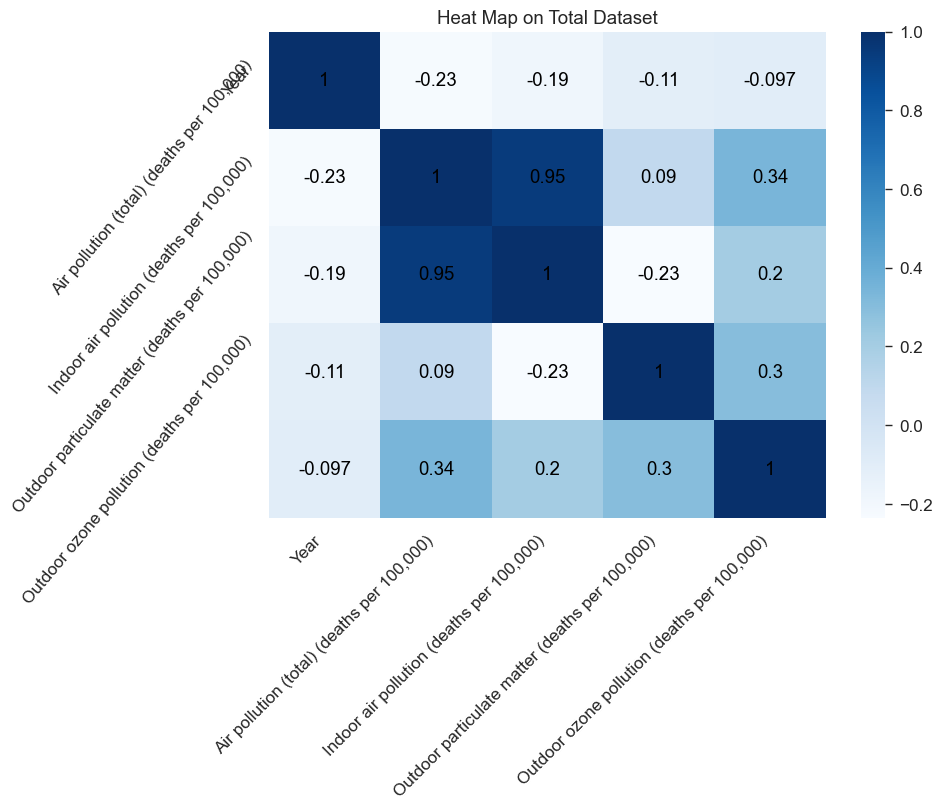

In [58]:
plt.figure(figsize = (8,6))
sns.set_context('paper', font_scale = 1.4)
data_mx = data.corr()
heatmap = sns.heatmap(data_mx, annot = True, cmap = 'Blues', annot_kws={"color": "black"})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontname='Arial')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Arial')
plt.title('Heat Map on Total Dataset')
plt.show()

<!-- data.isnull() -->

In [194]:
import pickle
with open("LR.pickle","wb") as file:
    pickle.dump(lr_model,file)
with open("LR.pickle","rb") as file:
    LR = pickle.load(file)

In [3]:
new_data = pd.read_csv('Death-rates-from-air-pollution.csv')
new_data.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [5]:
countries = new_data.copy(deep=True)
countries.dropna(inplace=True)

In [8]:
countries.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [ ]:
countries = data.copy(deep=True)
countries.dropna(inplace=True)

# Machine Learning

# Random Forest

# Import Neccesary Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
# READING OF DATA 

data_rf = pd.read_csv('Death-rates-from-air-pollution.csv')
data_rf.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [4]:
# DROPING UNWANTATED COLUMNS

data_rf.drop(['Entity', 'Code'], axis = 1, inplace = True)

In [5]:
data_rf.head()

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,1990,299.477309,250.362910,46.446589,5.616442
1,1991,291.277967,242.575125,46.033841,5.603960
2,1992,278.963056,232.043878,44.243766,5.611822
3,1993,278.790815,231.648134,44.440148,5.655266
4,1994,287.162923,238.837177,45.594328,5.718922


In [7]:
# CHECKING NULL VALUES

data_rf.isna().sum()

Year                                               0
Air pollution (total) (deaths per 100,000)         0
Indoor air pollution (deaths per 100,000)          0
Outdoor particulate matter (deaths per 100,000)    0
Outdoor ozone pollution (deaths per 100,000)       0
dtype: int64

In [8]:
# SELECTING FEATURES

x = data_rf.drop('Air pollution (total) (deaths per 100,000)', axis = 1)
y = data_rf['Air pollution (total) (deaths per 100,000)']

In [9]:
# TRAING THE DATA

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
# CALLING MODEL

model = RandomForestRegressor()

In [12]:
# FITTING MODEL

model.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
#PREDICTING VALUES

y_pred = model.predict(x_test)
data_pred = pd.DataFrame(y_pred, columns = ['Prediction'])
data_pred.head(10)

,Prediction
0,79.291180
1,56.902063
2,68.791344
3,25.533878
4,29.681421
5,114.658701
6,24.900912
7,66.335895
8,181.924569
9,23.789964


In [15]:
# PREDICTING SPECIFIC YEAR

new_data = pd.DataFrame({'Year' : [2022],'Indoor air pollution (deaths per 100,000)': [2822.7177], 'Outdoor particulate matter (deaths per 100,000)' : [12.346], 'Outdoor ozone pollution (deaths per 100,000)': [1.993388] })
future = model.predict(new_data)
print(future)

[298.52103073]


In [36]:
# PREDICTING SPECIFIC YEARS
year = [2022, 2023, 2024]
indoor = [100, 150, 200]
outdoor = [250, 305, 351]
ozone_outdoor = [51, 8, 1]
new_data = pd.DataFrame({
    'Year': year,
    'Indoor air pollution (deaths per 100,000)': indoor,
    'Outdoor particulate matter (deaths per 100,000)': outdoor,
    'Outdoor ozone pollution (deaths per 100,000)': ozone_outdoor
})
predictions = model.predict(new_data)
data_frame = pd.DataFrame({'Year': year,
                           'Indoor air pollution (deaths per 100,000)':indoor,
                          'Outdoor particulate matter (deaths per 100,000)': outdoor,
                           'Outdoor ozone pollution (deaths per 100,000)' : ozone_outdoor,
                          'Predictions':predictions})
data_frame

,Year,"Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Predictions
0,2022,100,250,51,172.149857
1,2023,150,305,8,202.851751
2,2024,200,351,1,236.577282


# ACCURACY

In [16]:
model.score(x_train, y_train)

0.9999253732410457

# MEAN SQUARED ERROR

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.509076498438048


# MEAN ABSOLUT ERROR

In [20]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.7508258992742878


# R SQUERED

In [21]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9995454146576859


# Linear Regression Model

In [66]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_slopes = []
lr_intercepts = []
lr_scores = []

for r in region:
    X = regions[regions['Entity'] == r].iloc[:,1].values.reshape(-1,1)
    y = regions[regions['Entity'] == r].iloc[:,2].values.reshape(-1,1)
    lr_model.fit(X, y)
    lr_slopes.append(round(lr_model.coef_[0][0], 2))
    lr_intercepts.append(round(lr_model.intercept_[0], 2))
    lr_scores.append(round(lr_model.score(X, y), 2))
lr_region = pd.DataFrame({'Region': region, 'Slope': lr_slopes, 'Intercept': lr_intercepts, 'Score': lr_scores})
lr_region.sort_values(by='Slope').reset_index(drop=True)
# required.to_latex()

,Region,Slope,Intercept,Score
0,East Asia,-4.23,8600.32,0.98
1,"Southeast Asia, East Asia, and Oceania",-3.63,7384.33,0.99
2,Eastern Sub-Saharan Africa,-2.85,5849.92,0.96
3,South Asia,-2.70,5578.92,0.97
4,Central Sub-Saharan Africa,-2.24,4649.25,0.94
5,Western Sub-Saharan Africa,-2.21,4551.08,0.99
6,Sub-Saharan Africa,-2.12,4383.13,0.94
7,Southeast Asia,-1.76,3610.33,0.99
8,Andean Latin America,-1.70,3467.53,0.97
9,North Africa and Middle East,-1.70,3491.42,0.99


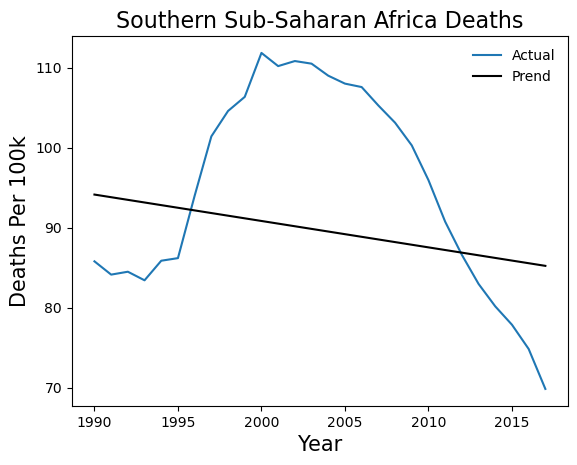

In [23]:
plt.plot(regions[regions['Entity'] == 'Southern Sub-Saharan Africa'].groupby('Year').mean().iloc[:,0], 
         label = 'Actual')
plt.plot(regions[regions['Entity'] == 'Southern Sub-Saharan Africa']['Year'], 
         [y * lr_region[lr_region['Region'] == 'Southern Sub-Saharan Africa']['Slope'] + \
    lr_region[lr_region['Region'] == 'Southern Sub-Saharan Africa']['Intercept'] \
    for y in regions[regions['Entity'] == 'Southern Sub-Saharan Africa']['Year']],
        label = 'Prend', c='black')
plt.xlabel('Year', size=15)  
plt.ylabel('Deaths Per 100k', size=15)  
plt.title('Southern Sub-Saharan Africa Deaths', size=16, fontfamily='sans-serif')  
legend = plt.legend(frameon=1, loc='best')  
frame = legend.get_frame()
frame.set_color('white')
plt.style.use('fivethirtyeight')

In [24]:
lr_slopes = []
lr_intercepts = []
lr_scores = []
for c in countries['Entity'].unique():
    X = countries[countries['Entity'] == c].iloc[:,2].values.reshape(-1,1)
    y = countries[countries['Entity'] == c].iloc[:,3].values.reshape(-1,1)
    lr_model.fit(X, y)
    lr_slopes.append(round(lr_model.coef_[0][0], 2))
    lr_intercepts.append(round(lr_model.intercept_[0], 2))
    lr_scores.append(round(lr_model.score(X, y), 2))
lr_countries = pd.DataFrame({'Country': countries['Entity'].unique(), 
                      'Slope': lr_slopes, 'Intercept': lr_intercepts, 'Score': lr_scores})
increasing_countries = lr_countries[lr_countries['Slope'] > 0].reset_index(drop=True)
increasing_countries

,Country,Slope,Intercept,Score
0,Lesotho,1.50,-2844.75,0.53
1,Libya,0.13,-185.15,0.18
2,Philippines,0.37,-622.05,0.21
3,Uzbekistan,0.10,-90.46,0.01
4,Zimbabwe,1.92,-3713.18,0.39


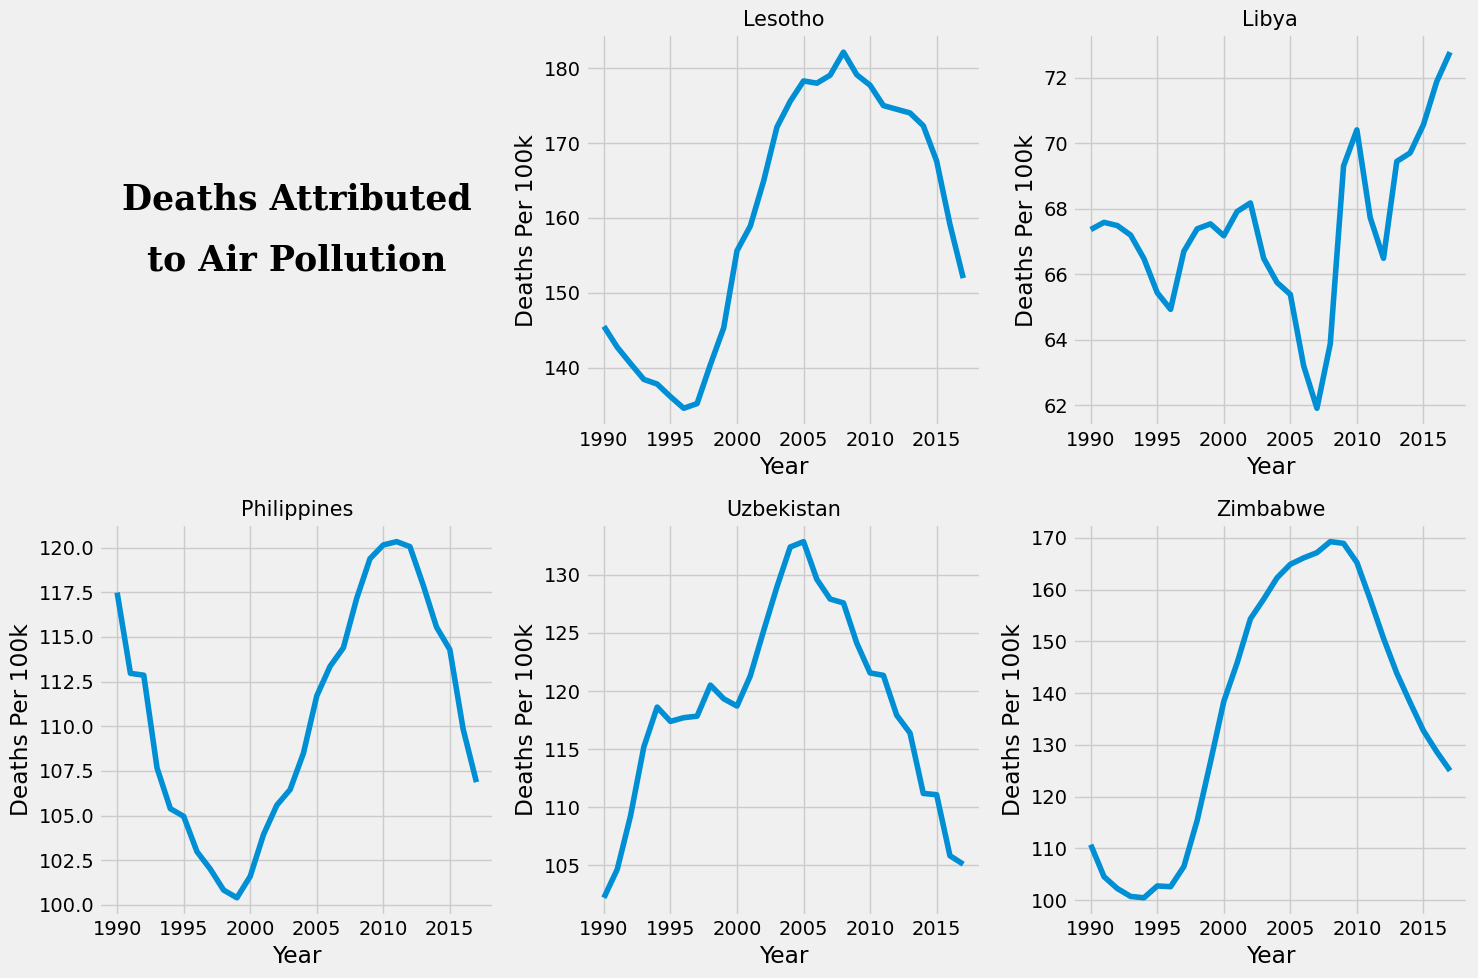

In [25]:
plt.figure(figsize=(15,10))
for i in range(len(increasing_countries)):
    plt.subplot(2,3,i+2) 
    plt.plot(countries[countries['Entity'] == increasing_countries.iloc[i][0]].iloc[:,2],
             countries[countries['Entity'] == increasing_countries.iloc[i][0]].iloc[:,3])
    plt.xlabel('Year') 
    plt.ylabel('Deaths Per 100k')
    plt.title(increasing_countries.iloc[i][0], size=15)

plt.subplot(2,3,1)
plt.axis('off')
plt.text(0.5, 0.5, 'Deaths Attributed\nto Air Pollution', size=25, ha='center', va='center',
        linespacing=2, fontfamily='serif', fontweight='bold')
plt.style.use('fivethirtyeight')
plt.tight_layout()

In [26]:
X = countries['Year'].unique().reshape(-1,1)
y = countries.groupby('Year').mean().iloc[:,0].values
split_i = int(len(y)*0.8) + 1
X_train = X[:split_i]
X_test = X[split_i:]
y_train = y[:split_i]
y_test = y[split_i:]
lr_model.fit(X_train, y_train)
round(lr_model.score(X_test, y_test), 2)

0.73

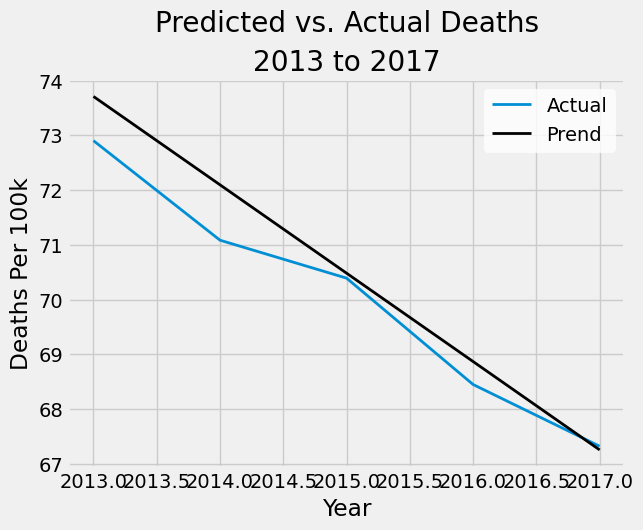

In [34]:
# Using our model to predict y-values from our test set's x-values
y_pred = lr_model.predict(X_test)

plt.plot(X_test, y_test, label='Actual', linewidth=2)  # Adding the actual deaths data to the plot
plt.plot(X_test, y_pred, label='Prend', c='black', linewidth=2)  # Adding the predicted deaths trendline to the plot
plt.title('Predicted vs. Actual Deaths\n2013 to 2017', linespacing=1.5,
         fontfamily='sans-serif')  # Adding a title
plt.xlabel('Year')  # Labeling the x-axis
plt.ylabel('Deaths Per 100k')  # Labeling the y-axis
legend = plt.legend(frameon=1, loc='best')  # Adding the legend and assigning it to a variable
frame = legend.get_frame()  # Assigning the legend's frame to a variable
frame.set_color('white')  # Setting the background color of the legend

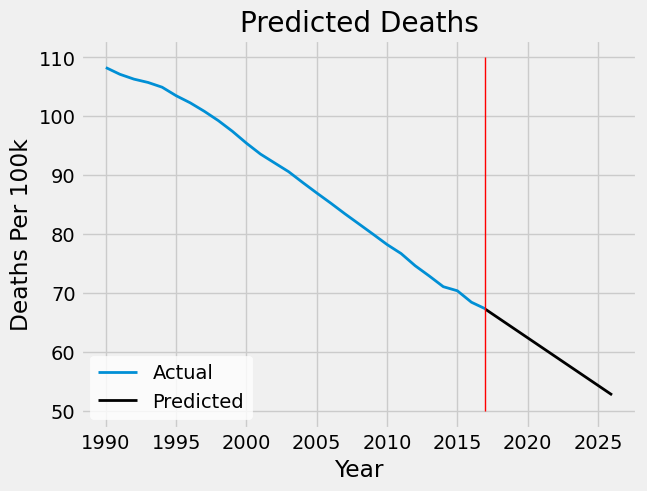

In [28]:
lr_model.fit(X, y)
X_future = np.array(range(2017,2069)).reshape(-1,1)
y_pred = lr_model.predict(X_future)
pred_df = pd.DataFrame(list(zip([x[0] for x in X_future], y_pred)), columns = ['Year', 'Prediction'])
plt.plot(X, y, label='Actual', linewidth=2)
plt.plot(pred_df['Year'].iloc[:10,], pred_df['Prediction'].iloc[:10,],
         c='black', label='Predicted', linewidth=2)
plt.vlines(x=2017, ymin=50, ymax=110, color='red', linewidths = 1)
plt.xlabel('Year')
plt.ylabel('Deaths Per 100k')
plt.title('Predicted Deaths', fontfamily='sans-serif')
plt.legend(loc='lower left') 
plt.style.use('fivethirtyeight') 
legend = plt.legend(frameon=1, loc=3)
frame = legend.get_frame() 
frame.set_color('white')

In [29]:
pred_df.head(10)

,Year,Prediction
0,2017,67.252166
1,2018,65.637059
2,2019,64.021951
3,2020,62.406844
4,2021,60.791736
5,2022,59.176629
6,2023,57.561521
7,2024,55.946414
8,2025,54.331306
9,2026,52.716198


# Predicted Result

In [70]:
start = int(input('Enter star year : '))
end = int(input('Enter end Year : '))
X_future = np.array(range(start,end)).reshape(-1,1)
y_pred = lr_model.predict(X_future)
pred_df = pd.DataFrame(list(zip([x[0] for x in X_future], y_pred)), columns = ['Year', 'Prediction'])
pred_df

Enter star year : 2000
Enter end Year : 2010


,Year,Prediction
0,2000,[138.5734176084179]
1,2001,[136.36716226984026]
2,2002,[134.1609069312617]
3,2003,[131.95465159268315]
4,2004,[129.7483962541055]
5,2005,[127.54214091552694]
6,2006,[125.3358855769493]
7,2007,[123.12963023837074]
8,2008,[120.92337489979218]
9,2009,[118.71711956121453]


In [57]:
y_range = max(y_test) - min(y_pred)
ame_accuracy = (1 - (mae / y_range)) * 100
print("Accuracy : ",ame_accuracy)

Accuracy :  91.51589326241282


In [264]:
y_test

array([72.90439723, 71.08502938, 70.39184057, 68.44759946, 67.31899988])

In [266]:
y_pred

array([94.70899376, 93.09388625, 91.47877874, 89.86367123, 88.24856372,
       86.63345621, 85.0183487 , 83.40324119, 81.78813368, 80.17302617,
       78.55791866, 76.94281115, 75.32770364, 73.71259613, 72.09748862,
       70.48238111, 68.8672736 , 67.25216609, 65.63705858, 64.02195107])

In [39]:
X_test

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017]], dtype=int64)

# Mean Absolute Error

In [37]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ",mae)
y_range = max(y_test) - min(y_test)
ame_accuracy = (1 - (mae / y_range)) * 100
print("Accuracy : ",ame_accuracy)

Mean Absolute Error :  0.4795413229559472
Accuracy :  91.41437407015665


# Mean Squared Error

In [73]:
# mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 0.3734099820264706


# Root Mean Squared Error

In [53]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.6110728123771099


# R-squared

In [54]:
r_squred = r2_score(y_test, y_pred)
print('R-squared :', r_squred)

R-squared : 0.9035599134125649


# Accurecy

In [51]:
y_range = max(y_test) - min(y_test)
ame_accuracy = (1 - (mae / y_range)) * 100
print("Accuracy : ",ame_accuracy)

Accuracy :  91.41437407015665
